<a href="https://colab.research.google.com/github/LilySu/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/Lily_Su_DS3_Unit_1_Sprint_Challenge_3_Data_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

# Data Storytelling

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [144]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 7.0MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [4]:
df.head(3)

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"


In [5]:
df.shape

(2693, 6)

In [0]:
df = df[df.Guest != '(None)']

In [0]:
df = df[df.Guest != '(no guest)']

In [8]:
df.nunique


<bound method DataFrame.nunique of       Year   GoogleKnowlege_Occupation      Show       Group  \
0     1999                       actor   1/11/99      Acting   
1     1999                    Comedian   1/12/99      Comedy   
2     1999          television actress   1/13/99      Acting   
3     1999                film actress   1/14/99      Acting   
4     1999                       actor   1/18/99      Acting   
5     1999                       actor   1/19/99      Acting   
6     1999             Singer-lyricist   1/20/99    Musician   
7     1999                       model   1/21/99       Media   
8     1999                       actor   1/25/99      Acting   
9     1999           stand-up comedian   1/26/99      Comedy   
10    1999                     actress   1/27/99      Acting   
11    1999                       actor   1/28/99      Acting   
12    1999          television actress  10/18/99      Acting   
13    1999                    Comedian  10/19/99      Comedy   
14   

In [9]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [10]:
just_unique = df.groupby(['Guest'])
just_unique.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"
5,1999,actor,1/19/99,Acting,William Baldwin,"Acting, Comedy & Music"
6,1999,Singer-lyricist,1/20/99,Musician,Michael Stipe,"Acting, Comedy & Music"
7,1999,model,1/21/99,Media,Carmen Electra,Media
8,1999,actor,1/25/99,Acting,Matthew Lillard,"Acting, Comedy & Music"
9,1999,stand-up comedian,1/26/99,Comedy,David Cross,"Acting, Comedy & Music"


In [11]:
print(len(df[df['Year'] == 1999]))

166


In [12]:
just_99 = df['Year']
just_99.value_counts()

2000    169
2003    166
2013    166
1999    166
2010    165
2012    164
2009    163
2011    163
2014    163
2004    163
2005    162
2008    162
2006    161
2002    159
2001    157
2007    141
2015    100
Name: Year, dtype: int64

In [13]:
all_acting = df[df['Occupation'] == 'Acting, Comedy & Music']
print(len(all_acting[all_acting['Year'] == 1999]))

150


In [14]:
print(150/166)

0.9036144578313253


**In 1999, 90.36 % of guests were in Acting, Comedy & Music**

In [15]:
all_acting.head(3)

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"


In [16]:
all_gov = df[df['Occupation'] == 'Government and Politics']
all_gov.head(3)

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
45,1999,us senator,12/7/99,Politician,"Senator Bob Dole, part 1",Government and Politics
46,1999,us senator,12/8/99,Politician,"Senator Bob Dole, part 2",Government and Politics
173,2000,former mayor of cincinatti,1/20/00,Politician,Jerry Springer,Government and Politics


In [17]:
all_media = df[df['Occupation'] == 'Media']
all_media.head(3)

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
7,1999,model,1/21/99,Media,Carmen Electra,Media
21,1999,television personality,10/5/99,Media,Maury Povich,Media
33,1999,Model,11/4/99,Media,Roshumba Williams,Media


In [0]:
all_other = df[df['Occupation'] != 'Media']
all_other = df[df['Occupation'] != 'Government and Politics'] 
all_other = df[df['Occupation'] != 'Acting, Comedy & Music']

In [19]:
df.shape, all_acting.shape, all_gov.shape, all_media.shape, all_other.shape

((2690, 6), (1203, 6), (384, 6), (756, 6), (1487, 6))

In [20]:
all_acting.groupby('Year').nunique()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
Year,,,,,,
1999,1,21,146,3,137,1
2000,1,21,123,3,119,1
2001,1,22,114,3,110,1
2002,1,8,98,3,94,1
2003,1,15,93,3,91,1
2004,1,14,62,3,61,1
2005,1,16,60,3,58,1
2006,1,12,58,3,57,1
2007,1,9,36,3,35,1


In [21]:
all_gov.groupby('Year').nunique()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
Year,,,,,,
1999,1,1,2,1,2,1
2000,1,8,14,2,9,1
2001,1,6,6,3,6,1
2002,1,8,11,3,9,1
2003,1,11,17,3,16,1
2004,1,25,36,3,31,1
2005,1,17,26,3,26,1
2006,1,27,31,3,30,1
2007,1,15,24,3,22,1


In [22]:
all_media.groupby('Year').nunique()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
Year,,,,,,
1999,1,11,10,1,10,1
2000,1,15,20,1,18,1
2001,1,22,31,2,30,1
2002,1,18,42,2,40,1
2003,1,21,39,1,38,1
2004,1,17,45,1,42,1
2005,1,18,53,1,51,1
2006,1,16,47,1,46,1
2007,1,19,47,1,46,1


In [23]:
all_other.groupby('Year').nunique()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
Year,,,,,,
1999,1,12,15,2,15,3
2000,1,28,42,6,35,3
2001,1,33,43,8,42,3
2002,1,31,60,9,56,3
2003,1,40,70,9,68,3
2004,1,57,98,11,89,3
2005,1,54,99,11,99,3
2006,1,60,103,11,100,3
2007,1,61,104,13,101,3


In [24]:
# pd.crosstab(all_acting, [all_gov, all_other], rownames=['Year'], colnames=['Occupation'])

Occupation_by_year = pd.crosstab(df['Year'], df['Occupation'], margins=True, margins_name="Total")
Occupation_by_year

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other,Total
Year,,,,,
1999,150,2,11,3,166
2000,125,14,21,9,169
2001,114,6,31,6,157
2002,99,11,42,7,159
2003,93,17,41,15,166
2004,63,37,45,18,163
2005,60,26,54,22,162
2006,58,31,47,25,161
2007,36,24,47,34,141


In [0]:
Occupation_by_year['Act%'] = Occupation_by_year['Acting, Comedy & Music']/Occupation_by_year['Total']
Occupation_by_year['Gov%'] = Occupation_by_year['Government and Politics']/Occupation_by_year['Total']
Occupation_by_year['Media%'] = Occupation_by_year['Media']/Occupation_by_year['Total']
Occupation_by_year['Other%'] = Occupation_by_year['Other']/Occupation_by_year['Total']

In [26]:
Occupation_by_year

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other,Total,Act%,Gov%,Media%,Other%
Year,,,,,,,,,
1999,150,2,11,3,166,0.903614,0.012048,0.066265,0.018072
2000,125,14,21,9,169,0.739645,0.082840,0.124260,0.053254
2001,114,6,31,6,157,0.726115,0.038217,0.197452,0.038217
2002,99,11,42,7,159,0.622642,0.069182,0.264151,0.044025
2003,93,17,41,15,166,0.560241,0.102410,0.246988,0.090361
2004,63,37,45,18,163,0.386503,0.226994,0.276074,0.110429
2005,60,26,54,22,162,0.370370,0.160494,0.333333,0.135802
2006,58,31,47,25,161,0.360248,0.192547,0.291925,0.155280
2007,36,24,47,34,141,0.255319,0.170213,0.333333,0.241135


In [27]:
Occupation_by_year.loc[[2015]]

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other,Total,Act%,Gov%,Media%,Other%
Year,,,,,,,,,
2015,45,17,24,14,100,0.45,0.17,0.24,0.14


**45% in 2015.**




In [28]:
Occupation_by_year['Acting, Comedy & Music']

Year
1999      150
2000      125
2001      114
2002       99
2003       93
2004       63
2005       60
2006       58
2007       36
2008       34
2009       34
2010       58
2011       55
2012       44
2013       71
2014       64
2015       45
Total    1203
Name: Acting, Comedy & Music, dtype: int64

In [0]:
Occupation_by_year.reset_index(inplace=True)

# Part 2 — Recreate this explanatory visualization:

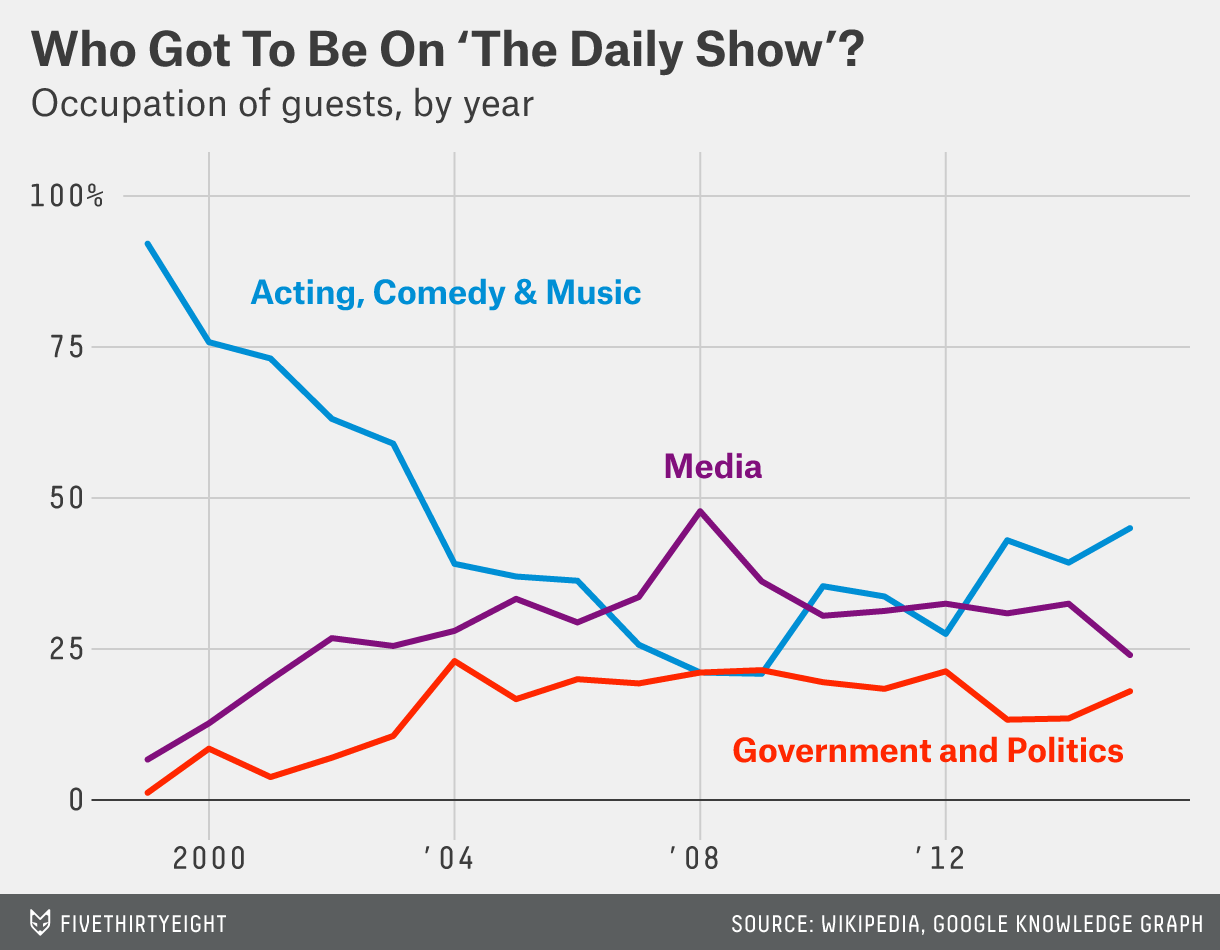

In [29]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

In [0]:

for_graphing = Occupation_by_year.drop(columns=['Acting, Comedy & Music', 'Government and Politics', 'Media','Other','Total','Other%'])

In [75]:
for_graphing

Occupation,Year,Act%,Gov%,Media%
0,1999,0.903614,0.012048,0.066265
1,2000,0.739645,0.082840,0.124260
2,2001,0.726115,0.038217,0.197452
3,2002,0.622642,0.069182,0.264151
4,2003,0.560241,0.102410,0.246988
5,2004,0.386503,0.226994,0.276074
6,2005,0.370370,0.160494,0.333333
7,2006,0.360248,0.192547,0.291925
8,2007,0.255319,0.170213,0.333333
9,2008,0.209877,0.203704,0.475309


In [0]:
for_graphing = for_graphing.drop([17])

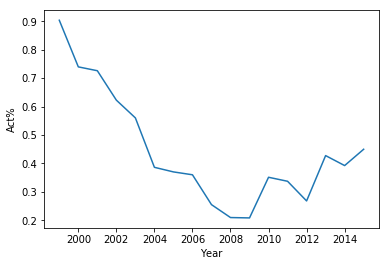

In [68]:
import matplotlib.pyplot as plt
acting = for_graphing
# ax = sns.lineplot(x='Year', y='Acting, Comedy & Music', data = acting)
ax = sns.lineplot(x='Year', y='Act%', data = for_graphing)

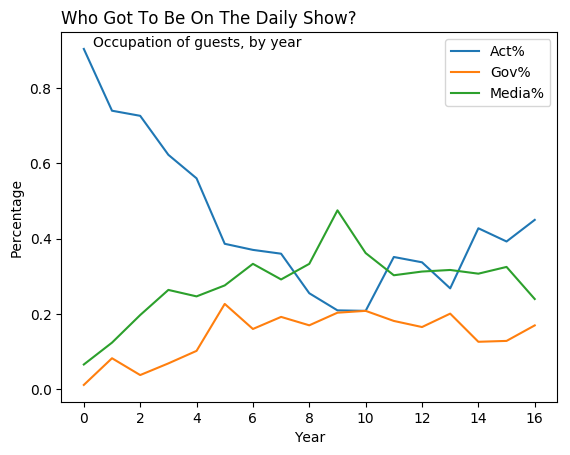

In [127]:
import matplotlib.pyplot as plt
# ax = fig.add_subplot(1, 1, 1)
# ax.plot(xdata1, ydata1, 'r', xdata2, ydata2, 'b')
plt.plot(for_graphing['Act%'])
plt.plot(for_graphing['Gov%'])
plt.plot(for_graphing['Media%'])
plt.ylabel('Percentage')
plt.xlabel('Year')
# ax.text(x=0, y=1.1, s='Who Got To Be On The Daily Show?',
#        fontsize=14, fontweight='bold');
plt.title('Who Got To Be On The Daily Show?',loc='left')
plt.figtext(.5,.85,"Occupation of guests, by year",fontsize=10,ha='right')
plt.legend()
plt.show()



# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)

In [0]:
sorted = df['Guest'].value_counts()

In [123]:
my_list = sorted.tolist()
just_10_num = my_list[:10]
print(just_10_num)


[19, 17, 16, 13, 13, 12, 10, 10, 10, 10]


In [0]:
sortedlist = sorted.reset_index()
sortedlist

In [0]:

names_top10 = sortedlist.rename(index=str, columns={"index": "names"})
print(names_top10)

In [118]:
sortedlist_list = sortedlist['index'].tolist()
print(sortedlist_list)

['Fareed Zakaria', 'Denis Leary', 'Brian Williams', 'Paul Rudd', 'Ricky Gervais', 'Tom Brokaw', 'Richard Lewis', 'Will Ferrell', "Bill O'Reilly", 'Reza Aslan', 'Sarah Vowell', 'Adam Sandler', 'Louis C.K.', 'Maggie Gyllenhaal', 'Mike Huckabee', 'Ben Affleck', 'Doris Kearns Goodwin', 'Jeff Garlin', 'Colin Firth', 'Bob Dole', 'Steve Carell', 'Samuel L. Jackson', 'Michael Moore', 'Bill Clinton', 'Neil deGrasse Tyson', 'Newt Gingrich', 'Sen. John McCain', 'Andrew Napolitano', 'Austan Goolsbee', 'Ted Koppel', 'Elizabeth Warren', 'Jon Meacham', 'Jake Gyllenhaal', 'Madeleine Albright', 'Paul Giamatti', 'Bill Kristol', 'Tim Gunn', 'Rachel Maddow', 'Seth Green', 'Sandra Bullock', 'George Stephanopoulos', 'Calvin Trillin', 'Ed Gillespie', 'Rachel Weisz', 'Robert Reich', 'Angelina Jolie', 'Michael Beschloss', 'Al Franken', 'Martin Short', 'Chris Wallace', 'Walter Isaacson', 'Tracey Ullman', 'John McCain', 'Jamie Foxx', 'Seth Rogen', 'Colin Quinn', 'Arianna Huffington', 'Howard Dean', 'David Cross'

In [122]:
just_10_ppl = sortedlist_list[:10]
print(just_10_ppl)

['Fareed Zakaria', 'Denis Leary', 'Brian Williams', 'Paul Rudd', 'Ricky Gervais', 'Tom Brokaw', 'Richard Lewis', 'Will Ferrell', "Bill O'Reilly", 'Reza Aslan']


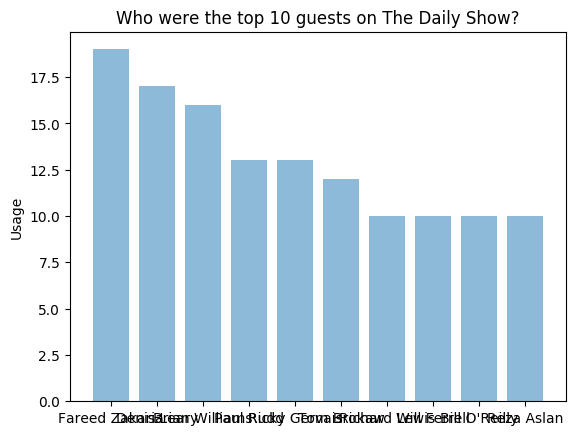

In [124]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = just_10_ppl
y_pos = np.arange(len(objects))
performance = just_10_num
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Who were the top 10 guests on The Daily Show?')
 
plt.show()